In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
# Assuming you have a dataset in CSV format named 'dataset.csv'
data = pd.read_csv('C:/Users/CSC/Desktop/Anil_sir/UNR-IDD_Changed_Labels.csv')

In [10]:
data.shape

(37411, 34)

In [3]:
data.head()

,Switch ID,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Packets Rx Dropped,Packets Tx Dropped,Packets Rx Errors,...,Unknown Load/Latest,Latest bytes counter,is_valid,Table ID,Active Flow Entries,Packets Looked Up,Packets Matched,Max Size,Label,Binary Label
0,of:000000000000000c,Port#:1,132,9181,6311853,238,46,0,0,0,...,0,0,True,0,9,767,688,-1,5,1
1,of:000000000000000c,Port#:2,187,6304498,15713,171,46,0,0,0,...,0,0,True,0,9,767,688,-1,5,1
2,of:000000000000000c,Port#:3,235,6311567,8030,58,46,0,0,0,...,0,0,True,0,9,767,688,-1,5,1
3,of:000000000000000c,Port#:4,59,7878,16439,182,46,0,0,0,...,0,0,True,0,9,767,688,-1,5,1
4,of:000000000000000a,Port#:1,188,6304547,16497,183,46,0,0,0,...,0,0,True,0,7,489,403,-1,5,1


In [4]:
missing_values = data.isna().sum()
print(missing_values)

Switch ID                        0
Port Number                      0
Received Packets                 0
Received Bytes                   0
Sent Bytes                       0
Sent Packets                     0
Port alive Duration (S)          0
Packets Rx Dropped               0
Packets Tx Dropped               0
Packets Rx Errors                0
Packets Tx Errors                0
Delta Received Packets           0
Delta Received Bytes             0
Delta Sent Bytes                 0
Delta Sent Packets               0
Delta Port alive Duration (S)    0
Delta Packets Rx Dropped         0
 Delta Packets Tx Dropped        0
Delta Packets Rx Errors          0
Delta Packets Tx Errors          0
Connection Point                 0
Total Load/Rate                  0
Total Load/Latest                0
Unknown Load/Rate                0
Unknown Load/Latest              0
Latest bytes counter             0
is_valid                         0
Table ID                         0
Active Flow Entries 

In [5]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(data['Label'])
data['Label'] = le.transform(data['Label'])

le.fit(data['Switch ID'])
data['Switch ID'] = le.transform(data['Switch ID'])

le.fit(data['Port Number'])
data['Port Number'] = le.transform(data['Port Number'])

le.fit(data['is_valid'])
data['is_valid'] = le.transform(data['is_valid'])



In [6]:
data.head()

,Switch ID,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Packets Rx Dropped,Packets Tx Dropped,Packets Rx Errors,...,Unknown Load/Latest,Latest bytes counter,is_valid,Table ID,Active Flow Entries,Packets Looked Up,Packets Matched,Max Size,Label,Binary Label
0,11,0,132,9181,6311853,238,46,0,0,0,...,0,0,0,0,9,767,688,-1,5,1
1,11,1,187,6304498,15713,171,46,0,0,0,...,0,0,0,0,9,767,688,-1,5,1
2,11,2,235,6311567,8030,58,46,0,0,0,...,0,0,0,0,9,767,688,-1,5,1
3,11,3,59,7878,16439,182,46,0,0,0,...,0,0,0,0,9,767,688,-1,5,1
4,9,0,188,6304547,16497,183,46,0,0,0,...,0,0,0,0,7,489,403,-1,5,1


<Axes: >

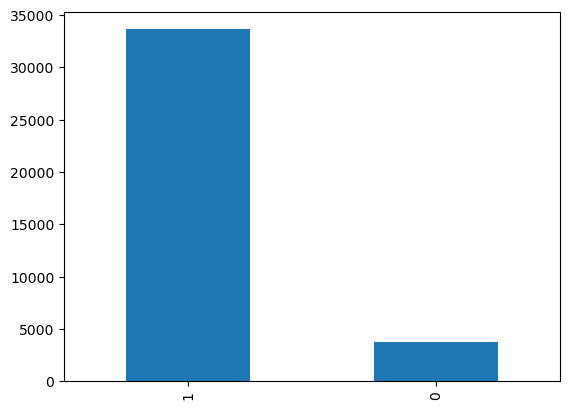

In [8]:
X = data.drop('Binary Label',axis=1)
y = data['Binary Label']
data['Binary Label'].value_counts().plot.bar()

In [11]:
X.shape

(37411, 33)

In [12]:
y.shape

(37411,)

In [13]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)



In [15]:
X_train.shape

(29928, 33)

In [16]:
X_test.shape

(7483, 33)

In [17]:
y_train.shape

(29928,)

In [18]:
y_test.shape

(7483,)

# logistic regression

In [19]:
# Initialize and train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)


C:\Users\CSC\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7980756381130563


# MLP

Model1

In [21]:
import tensorflow as tf


model1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(33,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [22]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2176      
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 256)               33024     
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 1)                 3

In [25]:
model1.fit(X_train, y_train, epochs=50, batch_size=64)

Epoch 1/50
468/468 [==============================] - 1s 2ms/step - loss: 0.3261 - accuracy: 0.8985
Epoch 2/50
468/468 [==============================] - 1s 2ms/step - loss: 0.3260 - accuracy: 0.8985
Epoch 3/50
468/468 [==============================] - 1s 2ms/step - loss: 0.3261 - accuracy: 0.8985
Epoch 4/50
468/468 [==============================] - 1s 2ms/step - loss: 0.3260 - accuracy: 0.8985
Epoch 5/50
468/468 [==============================] - 1s 2ms/step - loss: 0.3261 - accuracy: 0.8985
Epoch 6/50
468/468 [==============================] - 1s 2ms/step - loss: 0.3260 - accuracy: 0.8985
Epoch 7/50
468/468 [==============================] - 1s 2ms/step - loss: 0.3261 - accuracy: 0.8985
Epoch 8/50
468/468 [==============================] - 1s 2ms/step - loss: 0.3262 - accuracy: 0.8985
Epoch 9/50
468/468 [==============================] - 1s 2ms/step - loss: 0.3261 - accuracy: 0.8985
Epoch 10/50
468/468 [==============================] - 1s 2ms/step - loss: 0.3262 - accuracy: 0.8985

In [26]:
# Evaluate the model on the test set
loss, accuracy = model1.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

234/234 [==============================] - 0s 1ms/step - loss: 0.3192 - accuracy: 0.9016
Test Accuracy: 0.9016437530517578


Model2

In [27]:
import tensorflow as tf


model2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(33,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [28]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 64)                2176      
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4289 (16.75 KB)
Trainable params: 4289 (16.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
model2.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
936/936 [==============================] - 1s 2ms/step - loss: 11701.6289 - accuracy: 0.9331
Epoch 2/20
936/936 [==============================] - 1s 2ms/step - loss: 4015.3003 - accuracy: 0.9512
Epoch 3/20
936/936 [==============================] - 1s 2ms/step - loss: 4778.1426 - accuracy: 0.9438
Epoch 4/20
936/936 [==============================] - 1s 2ms/step - loss: 4514.1440 - accuracy: 0.9437
Epoch 5/20
936/936 [==============================] - 1s 1ms/step - loss: 4433.4736 - accuracy: 0.9407
Epoch 6/20
936/936 [==============================] - 1s 1ms/step - loss: 4067.9209 - accuracy: 0.9436
Epoch 7/20
936/936 [==============================] - 1s 2ms/step - loss: 3240.0942 - accuracy: 0.9503
Epoch 8/20
936/936 [==============================] - 1s 2ms/step - loss: 2233.9673 - accuracy: 0.9541
Epoch 9/20
936/936 [==============================] - 1s 2ms/step - loss: 1694.5917 - accuracy: 0.9545
Epoch 10/20
936/936 [==============================] - 1s 1ms/step - los

In [32]:
# Evaluate the model on the test set
loss, accuracy = model2.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

234/234 [==============================] - 0s 1ms/step - loss: 231.0058 - accuracy: 0.9583
Test Accuracy: 0.9583054780960083
